In [11]:
# Cleaning by KmendesDev

# Bibliotecas para importar:
import pandas as pd  # Para manusear dados tabulares
import seaborn as srn  # Para gráficos
import statistics as sts  # Para calculos matemáticos

In [12]:
# Importar os dados:
dataset = pd.read_csv("Churn.csv", sep=";")
# visualizar:
dataset.head()

,X0,X1,X2,X3,X4,X4.1,X6,X7,X8,X9,X10,X11
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [13]:
# Linhas e Colunas:
dataset.shape

(999, 12)

In [14]:
# Nomear as colunas:
dataset.columns = [
    "id",
    "Score",
    "Estado",
    "Gênero",
    "Idade",
    "Patrimônio",
    "Saldo",
    "Produtos",
    "Tem_Cartao_de_Credito",
    "Ativo",
    "Salário",
    "Saiu",
]
# Verificar a modificação:
dataset.head(1)

,id,Score,Estado,Gênero,Idade,Patrimônio,Saldo,Produtos,Tem_Cartao_de_Credito,Ativo,Salário,Saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1


In [15]:
# Explorar Dados Categóricos:
# Estado:
agrupado = dataset.groupby(["Estado"]).size()
agrupado

Estado
PR    257
RP      1
RS    478
SC    258
SP      4
TD      1
dtype: int64

<AxesSubplot:xlabel='Estado'>

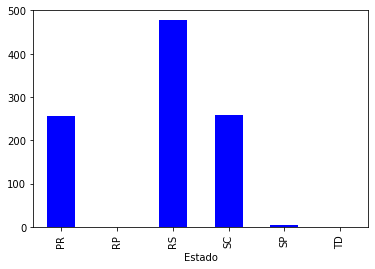

In [16]:
# Plotando gráfico de barras com a quantidade por Estado:
agrupado.plot.bar(color="blue")

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


AttributeError: 'FacetGrid' object has no attribute 'set_title'

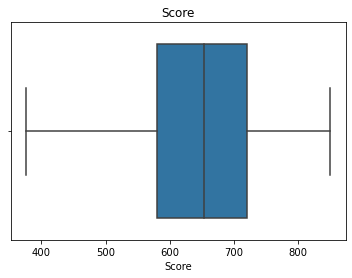

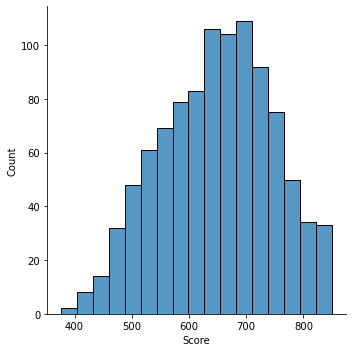

In [17]:
# Explorar colunas numéricas:
# Score
dataset["Score"].describe()
srn.boxplot(dataset["Score"]).set_title("Score")
srn.displot(dataset["Score"]).set_title("Score")

In [18]:
# Encontrar valores com NaN:
dataset.isnull().sum()

id                       0
Score                    0
Estado                   0
Gênero                   8
Idade                    0
Patrimônio               0
Saldo                    0
Produtos                 0
Tem_Cartao_de_Credito    0
Ativo                    0
Salário                  7
Saiu                     0
dtype: int64

In [19]:
# Encontrar a mediana da coluna Salário para inserir nos valores NaN:
mediana = sts.median(dataset["Salário"])
mediana

70518.0

In [20]:
# Substituição dos valores NaN em Salário pela mediana de maneira persistida
dataset["Salário"].fillna(mediana, inplace=True)

In [22]:
#Conferindo os valores Null na coluna Gênero:
dataset["Gênero"].isnull().sum()

0

In [23]:
#Substitui valores Null por "Masculino", tendo em vista que é o que mais aparece. 
dataset["Gênero"].fillna("Masculino", inplace=True)

In [24]:
# Padroniza de acordo com o domínio:
dataset.loc[
    dataset["Gênero"] == "M", "Gênero"
] = "Masculino"  # Onde tem "M" em gênero, coloca "Masculino"
dataset.loc[dataset["Gênero"].isin(["F", "Fem"]), "Gênero"] = "Feminino"

In [25]:
# Encontrar os valores fora do contexto:
dataset.loc[(dataset["Idade"] < 0) | (dataset["Idade"] > 120)]

,id,Score,Estado,Gênero,Idade,Patrimônio,Saldo,Produtos,Tem_Cartao_de_Credito,Ativo,Salário,Saiu
867,869,636,RS,Feminino,-10,1,17083346,1,1,0,11051028.0,1
984,986,773,RS,Masculino,-20,1,12453278,2,0,1,1172357.0,0
990,992,655,RS,Masculino,140,5,93147,2,1,0,6621413.0,0


In [26]:
# Substituir:
dataset.loc[(dataset["Idade"] < 0) | (dataset["Idade"] > 120), "Idade"] = mediana

In [27]:
# Encontrar dados duplicados:
dataset[dataset.duplicated(["id"], keep=False)]

,id,Score,Estado,Gênero,Idade,Patrimônio,Saldo,Produtos,Tem_Cartao_de_Credito,Ativo,Salário,Saiu
80,81,665,RS,Feminino,34,1,9664554,2,0,0,17141366.0,0
81,81,665,RS,Feminino,34,1,9664554,2,0,0,17141366.0,0


In [28]:
# Para remover dados duplicados:
dataset.drop_duplicates(subset="id", keep="first", inplace=True)

In [29]:
# Calcula o desvio padrão
desv = sts.stdev(dataset["Salário"])
desv

528988918.4679201

In [30]:
#Encontra onde o salário é maior que 2 vezes o desvio padrão.
dataset.loc[dataset["Salário"] >= 2 * desv]

,id,Score,Estado,Gênero,Idade,Patrimônio,Saldo,Produtos,Tem_Cartao_de_Credito,Ativo,Salário,Saiu
7,8,376,PR,Feminino,29,4,11504674,4,1,0,1.193469e+10,1
116,118,668,PR,Feminino,37,6,1678644,1,1,0,1.156383e+10,0
170,172,484,RS,Feminino,29,4,13011439,1,1,0,1.640179e+09,0
230,232,673,RS,Masculino,72,1,0,2,0,1,1.119812e+09,0


In [31]:
# Encontrar a mediana:
mediana = sts.median(dataset["Salário"])
mediana

8637195.5

In [33]:
# Substituímos pela mediana:
dataset.loc[dataset["Salário"] >= 2 * desv, "Salário"] = mediana